#  Avoid  overfitting  .
#  Dynamic batch sizing for minority classes.
#  Oversampling using ImageDataGenerator.
#  Class distribution analysis to adjust augmentation.

Class counts: cut
Mixed Brilliant       9568
Emerald Cut           1164
Radiant Cut            549
Asscher                529
Trillion Cut           278
Step Cut               180
Princess Cut            92
Brilliant               65
Modified Brilliant      54
Fancy Cut               32
Fancy Brilliant         32
Scissor Cut              6
French Cut               1
Carving                  1
Name: count, dtype: int64
Classes with only one sample: Index(['French Cut', 'Carving'], dtype='object', name='cut')
Found 10039 validated image filenames belonging to 12 classes.
Found 2510 validated image filenames belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 181s 569ms/step - accuracy: 0.7453 - loss: 1.1028 - val_accuracy: 0.7625 - val_loss: 0.8950 - learning_rate: 0.0010
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 177s 564ms/step - accuracy: 0.7650 - loss: 0.9095 - val_accuracy: 0.7845 - val_loss: 0.7396 - learning_rate: 0.0010
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 175s 558ms/step - accuracy: 0.7786 - loss: 0.7722 - val_accuracy: 0.8080 - val_loss: 0.6350 - learning_rate: 0.0010
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 177s 564ms/step - accuracy: 0.8168 - loss: 0.6659 - val_accuracy: 0.8263 - val_loss: 0.5686 - learning_rate: 0.0010
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 174s 555ms/step - accuracy: 0.8245 - loss: 0.6175 - val_accuracy: 0.8163 - val_loss: 0.5811 - learning_rate: 0.0010
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 179s 569ms/step - accuracy: 0.8294 - loss: 0.6087 - val_accuracy: 0.8446 - val_loss: 0.5372 - learning_rate: 0.0010
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 177s 562ms/step - accura

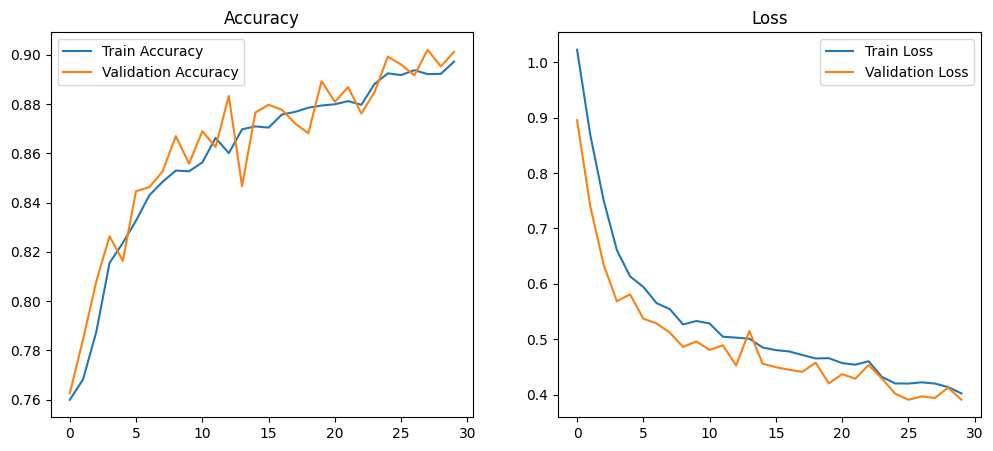

Found 2510 validated image filenames belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 372ms/step
                    precision    recall  f1-score   support

           Asscher       0.63      0.68      0.65       106
         Brilliant       0.00      0.00      0.00        13
       Emerald Cut       0.76      0.81      0.78       233
   Fancy Brilliant       0.00      0.00      0.00         6
         Fancy Cut       0.00      0.00      0.00         6
   Mixed Brilliant       0.96      0.97      0.96      1914
Modified Brilliant       0.00      0.00      0.00        11
      Princess Cut       0.78      0.39      0.52        18
       Radiant Cut       0.58      0.73      0.65       110
       Scissor Cut       0.00      0.00      0.00         1
          Step Cut       0.47      0.19      0.27        36
      Trillion Cut       0.71      0.66      0.69        56

          accuracy                           0.89      2510
         macro avg       0.41      0.37      0.38      2510
      weighted avg       0.88      0.89      0.88      2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable is CUT  drop cut  drop color intensity.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['cut'] = df['cut'].astype(str)  # Convert categorical labels to strings (target is 'cut' now)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['cut'].value_counts()
print("Class counts:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# ==========================
# ✅ Remove rows with classes having only one sample
# ==========================
df_filtered = df[~df['cut'].isin(classes_with_one_sample)]

# Split dataset into training & validation sets (after removing single-sample classes)
train_df, val_df = train_test_split(df_filtered, test_size=0.2, random_state=42, stratify=df_filtered['cut'])

# ==========================
# ✅ Data Augmentation
# ==========================
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,  # Rotate images randomly by 20 degrees
    width_shift_range=0.2,  # Shift image horizontally
    height_shift_range=0.2,  # Shift image vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom into images
    horizontal_flip=True,  # Flip images horizontally
    fill_mode="nearest"  # Fill missing pixels
)

# Create generators
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="cut",  # Target variable is 'cut'
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="cut",  # Target variable is 'cut'
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Prevents overfitting
    tf.keras.layers.Dense(len(train_df['cut'].unique()), activation='softmax')  # Set output size according to number of classes
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks (Early Stopping & Learning Rate Scheduler)
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half
    patience=3,  # Wait 3 epochs before reducing
    min_lr=1e-6  # Minimum learning rate
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="cut",  # Target variable is 'cut'
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Predict on test set
pred_probs = model.predict(test_generator)  # Get softmax probabilities
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)


# Check class distribution

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/final trget variable is CUT  drop cut  drop color intensity.csv")


# Check class distribution before and after data splitting
print("Class Distribution Before Split:\n", df['cut'].value_counts())

# After filtering out small classes (if applicable)
class_counts_after_filtering = df['cut'].value_counts()
print("Class Distribution After Filtering:\n", class_counts_after_filtering)


Class Distribution Before Split:
 cut
Mixed Brilliant       9568
Emerald Cut           1164
Radiant Cut            549
Asscher                529
Trillion Cut           278
Step Cut               180
Princess Cut            92
Brilliant               65
Modified Brilliant      54
Fancy Cut               32
Fancy Brilliant         32
Scissor Cut              6
French Cut               1
Carving                  1
Name: count, dtype: int64
Class Distribution After Filtering:
 cut
Mixed Brilliant       9568
Emerald Cut           1164
Radiant Cut            549
Asscher                529
Trillion Cut           278
Step Cut               180
Princess Cut            92
Brilliant               65
Modified Brilliant      54
Fancy Cut               32
Fancy Brilliant         32
Scissor Cut              6
French Cut               1
Carving                  1
Name: count, dtype: int64


# Use Enhance Data Augmentation for Minority Classes for cut model improve precision , recall and  F1score   ------ This is best model

Class counts before filtering: cut
Mixed Brilliant       9568
Emerald Cut           1164
Radiant Cut            549
Asscher                529
Trillion Cut           278
Step Cut               180
Princess Cut            92
Brilliant               65
Modified Brilliant      54
Fancy Cut               32
Fancy Brilliant         32
Scissor Cut              6
French Cut               1
Carving                  1
Name: count, dtype: int64
Classes with only one sample: Index(['French Cut', 'Carving'], dtype='object', name='cut')
Class counts after resampling: cut
Princess Cut          9568
Mixed Brilliant       9568
Step Cut              9568
Asscher               9568
Radiant Cut           9568
Emerald Cut           9568
Trillion Cut          9568
Fancy Cut             9568
Modified Brilliant    9568
Brilliant             9568
Fancy Brilliant       9568
Scissor Cut           9568
Name: count, dtype: int64
Found 91852 validated image filenames belonging to 12 classes.
Found 22964 validated 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1625s 565ms/step - accuracy: 0.3238 - loss: 1.9579 - val_accuracy: 0.6472 - val_loss: 1.0616 - learning_rate: 0.0010
Epoch 2/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1703s 593ms/step - accuracy: 0.6257 - loss: 1.0974 - val_accuracy: 0.7403 - val_loss: 0.7670 - learning_rate: 0.0010
Epoch 3/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1712s 596ms/step - accuracy: 0.7091 - loss: 0.8599 - val_accuracy: 0.8020 - val_loss: 0.6034 - learning_rate: 0.0010
Epoch 4/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1820s 634ms/step - accuracy: 0.7597 - loss: 0.7191 - val_accuracy: 0.8340 - val_loss: 0.4975 - learning_rate: 0.0010
Epoch 5/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1776s 618ms/step - accuracy: 0.7881 - loss: 0.6360 - val_accuracy: 0.8593 - val_loss: 0.4382 - learning_rate: 0.0010
Epoch 6/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1624s 566ms/step - accuracy: 0.8101 - loss: 0.5746 - val_accuracy: 0.8582 - val_loss: 0.4260 - learning_rate: 0.0010
Epoch 7/30
2871/2871 ━━━━━━━━━━━━━━━━━━━━ 1606

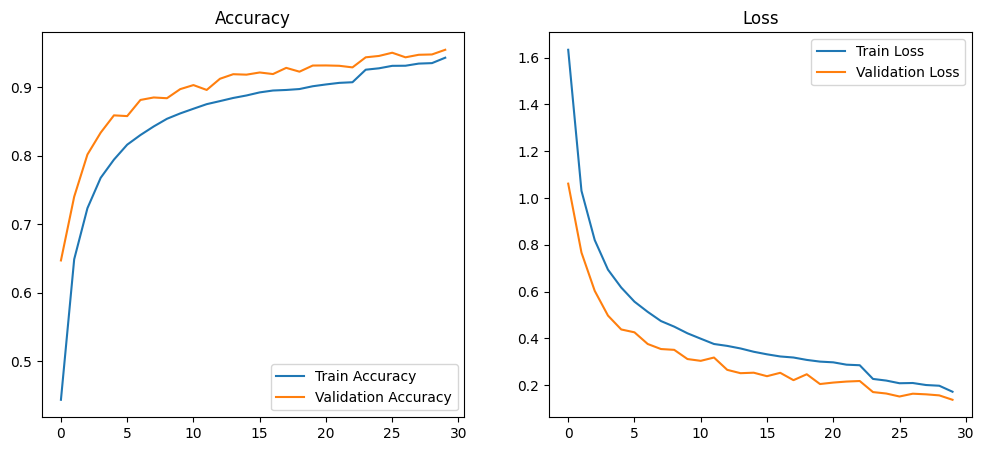

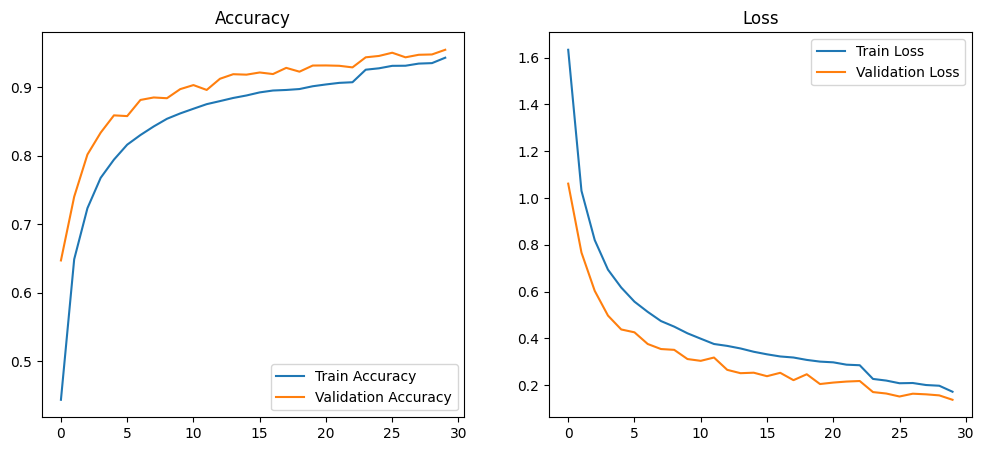

Found 22964 validated image filenames belonging to 12 classes.
Found 22964 validated image filenames belonging to 12 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 237s 330ms/step
718/718 ━━━━━━━━━━━━━━━━━━━━ 237s 330ms/step
                    precision    recall  f1-score   support

           Asscher       0.94      0.89      0.91      1913
         Brilliant       0.99      0.99      0.99      1914
       Emerald Cut       0.87      0.86      0.87      1914
   Fancy Brilliant       1.00      1.00      1.00      1914
         Fancy Cut       1.00      1.00      1.00      1914
   Mixed Brilliant       0.87      0.87      0.87      1914
Modified Brilliant       0.99      1.00      0.99      1914
      Princess Cut       1.00      1.00      1.00      1914
       Radiant Cut       0.90      0.91      0.91      1913
       Scissor Cut       1.00      1.00      1.00      1913
          Step Cut       0.98      0.98      0.98      1913
      Trillion Cut       0.95      0.99      0.97      1914

          accuracy                           0.96     22964
         macro avg       0.96      0.96      0.96     22964
      we

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler  # For balancing data

# ==========================
# ✅ Define Paths
# ==========================
csv_path = "/content/final trget variable is CUT  drop cut  drop color intensity.csv"  # Update with your CSV path
image_base_path = "/content/drive/MyDrive/Reupload_Images/"  # Folder containing images

# ==========================
# ✅ Load Dataset
# ==========================
df = pd.read_csv(csv_path)

# Convert image paths to absolute paths
df['Image id'] = df['Image id'].apply(lambda x: os.path.join(image_base_path, x))

# Ensure target variable is a string
df['cut'] = df['cut'].astype(str)  # Convert categorical labels to strings (target is 'cut' now)

# ==========================
# ✅ Check for classes with only one sample
# ==========================
class_counts = df['cut'].value_counts()
print("Class counts before filtering:", class_counts)

# Identify classes with only one sample
classes_with_one_sample = class_counts[class_counts == 1].index
print("Classes with only one sample:", classes_with_one_sample)

# Remove rows with classes having only one sample
df_filtered = df[~df['cut'].isin(classes_with_one_sample)]

# ==========================
# ✅ Oversample Minority Classes
# ==========================
X = df_filtered['Image id'].values.reshape(-1, 1)  # Convert to numpy array
y = df_filtered['cut'].values  # Labels

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # Oversampling strategy
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create new DataFrame with resampled data
df_resampled = pd.DataFrame({'Image id': X_resampled.flatten(), 'cut': y_resampled})

# Check new class distribution
print("Class counts after resampling:", df_resampled['cut'].value_counts())

# ==========================
# ✅ Train-Validation Split
# ==========================
train_df, val_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['cut'])

# ==========================
# ✅ Define Augmentation
# ==========================
# General augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# ✅ Define different augmentation settings for minority classes
minority_classes = class_counts[class_counts < 50].index.tolist()  # Adjust threshold as needed

minority_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode="nearest"
)

# Function to select appropriate data generator
def get_datagen(label):
    return minority_datagen if label in minority_classes else datagen

# ==========================
# ✅ Image Data Generators
# ==========================
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image id",
    y_col="cut",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="cut",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# ==========================
# ✅ Define CNN Model
# ==========================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_df['cut'].unique()), activation='softmax')  # Adjust output layer
])

# ==========================
# ✅ Compile Model
# ==========================
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ==========================
# ✅ Define Callbacks
# ==========================
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ==========================
# ✅ Train Model
# ==========================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping, lr_scheduler]
)

# ==========================
# ✅ Plot Accuracy & Loss
# ==========================
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

# ==========================
# ✅ Test Set Classification Report
# ==========================
test_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="Image id",
    y_col="cut",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Predict on test set
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=class_labels)
print(report)


In [2]:
# ✅ Save in the latest Keras format (recommended)
model.save("picture cut.keras")

# ✅ Save in HDF5 format (optional, legacy format)
model.save("picture cut.h5", save_format="h5")

# ✅ Save in TensorFlow SavedModel format (for TFLite/TF Serving)
model.export("picture_tf")

print("✅ Model saved successfully in .keras, .h5, and TensorFlow SavedModel format!")

Saved artifact at 'picture_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  140696407470928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696407472848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696407471696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696407471312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696407473424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696407474000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696407473616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696403412560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696403412944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140696403414480: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Model saved success

# Model Testing Code

In [14]:
import tensorflow as tf
import numpy as np
import cv2
import os

# ==========================
# ✅ Load Trained Model
# ==========================
model_path ="/content/picture cut.h5"  # Update with the correct path
model = tf.keras.models.load_model(model_path)

# ==========================
# ✅ Class Labels
# ==========================
class_labels = ['Asscher','Brilliant','Emerald Cut','Fancy Brilliant','Fancy Cut','Mixed Brilliant','Modified Brilliant','Princess Cut','Radiant Cut','Scissor Cut','Step Cut','Trillion Cut']  # Replace with your actual class labels

# ==========================
# ✅ Preprocess Input Image
# ==========================
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))  # Resize to match model input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dims for batch processing
    return img

# ==========================
# ✅ Predict Function
# ==========================
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)
    return class_labels[predicted_class], confidence

# ==========================
# ✅ Test with an Image
# ==========================
test_image_path = "/content/White Sapphire 236.jpg"  # Update with the correct image path
predicted_label, confidence = predict_image(test_image_path)
print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Class: Emerald Cut, Confidence: 0.54


In [3]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
